<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Multivariate_analysis_vehicle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate analysis using Seaborn 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/Car_details_v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [77]:
df.shape

(8128, 13)

In [78]:
df2 = df["name"].str.split(" ", n = 1, expand = True)
#df["name"].str.extract("(\d+),(\d+),(\d+)", expand=True)
df2.head()

,0,1
0,Maruti,Swift Dzire VDI
1,Skoda,Rapid 1.5 TDI Ambition
2,Honda,City 2017-2020 EXi
3,Hyundai,i20 Sportz Diesel
4,Maruti,Swift VXI BSIII


In [79]:
df2.shape

(8128, 2)

In [80]:
df = df.join(df2)
df.shape

(8128, 15)

In [81]:
# Dropping old Name columns
df.drop(columns =["name"], inplace = True)
df.drop(columns =["torque"], inplace = True)
df.shape

(8128, 13)

In [82]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,0,1
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti,Swift VXI BSIII


In [83]:
df= df.iloc[:,[11,12,0,1,2,3,4,5,6,7,8,9,10]]
df.head()

,0,1,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [84]:
df.rename(columns={0:'make', 1:'model'},inplace=True)
df.rename(columns = {'mileage':'mileage_kmpl'}, inplace = True)
df.rename(columns = {'engine':'engine_cc'}, inplace = True)
df.rename(columns = {'max_power':'max_power_bhp'}, inplace = True)
df.head()

,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats
0,Maruti,Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [85]:
df.shape

(8128, 13)

In [86]:
df['mileage_kmpl'] = df['mileage_kmpl'].replace(['kmpl'], '', regex=True)
df['engine_cc'] = df['engine_cc'].replace(['CC'], '', regex=True)
df['max_power_bhp'] = df['max_power_bhp'].replace(['bhp'], '', regex=True)

df.head()

,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats
0,Maruti,Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda,City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai,i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti,Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [87]:
df['mileage_kmpl'] = df['mileage_kmpl'].replace(['km/kg'], '', regex=True)

In [89]:
df['max_power_bhp'] = df['max_power_bhp'].replace(r'\s*(.*?)\s*', r'\1', regex=True)

['74 ' '103.52 ' '78 ' '90 ' '88.2 ' '81.86 ' '57.5 ' '37 ' '67.1 '
 '68.1 ' '108.45 ' '60 ' '73.9 ' nan '67 ' '82 ' '88.5 ' '46.3 ' '88.73 '
 '64.1 ' '98.6 ' '88.8 ' '83.81 ' '83.1 ' '47.3 ' '73.8 ' '34.2 ' '35 '
 '81.83 ' '40.3 ' '121.3 ' '138.03 ' '160.77 ' '117.3 ' '116.3 ' '83.14 '
 '67.05 ' '168.5 ' '100 ' '120.7 ' '98.63 ' '175.56 ' '103.25 ' '171.5 '
 '100.6 ' '174.33 ' '187.74 ' '170 ' '78.9 ' '88.76 ' '86.8 ' '108.495 '
 '108.62 ' '93.7 ' '103.6 ' '98.59 ' '189 ' '67.04 ' '68.05 ' '58.2 '
 '82.85 ' '81.80 ' '73 ' '120 ' '94.68 ' '160 ' '65 ' '155 ' '69.01 '
 '126.32 ' '138.1 ' '83.8 ' '126.2 ' '98.96 ' '62.1 ' '86.7 ' '188 '
 '214.56 ' '177 ' '280 ' '148.31 ' '254.79 ' '190 ' '177.46 ' '204 '
 '141 ' '117.6 ' '241.4 ' '282 ' '150 ' '147.5 ' '108.5 ' '103.5 ' '183 '
 '181.04 ' '157.7 ' '164.7 ' '91.1 ' '400 ' '68 ' '75 ' '85.8 ' '87.2 '
 '53 ' '118 ' '103.2 ' '83 ' '84 ' '58.16 ' '147.94 ' '74.02 ' '53.3 '
 '80 ' '88.7 ' '97.7 ' '121.36 ' '162 ' '140 ' '94 ' '100.57 ' '82.9 '


In [92]:
df[["mileage_kmpl"]] = df[["mileage_kmpl"]].apply(pd.to_numeric)
df[["engine_cc"]] = df[["engine_cc"]].apply(pd.to_numeric)
df[["max_power_bhp"]] = df[["max_power_bhp"]].apply(pd.to_numeric)
df.head()

,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats
0,Maruti,Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [ ]:
cars.head()

# Part one: Relationships between Numeric and numeric features

In [93]:
df.describe()

,year,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


1. Pair plot
You can see the visual relationships between pairs

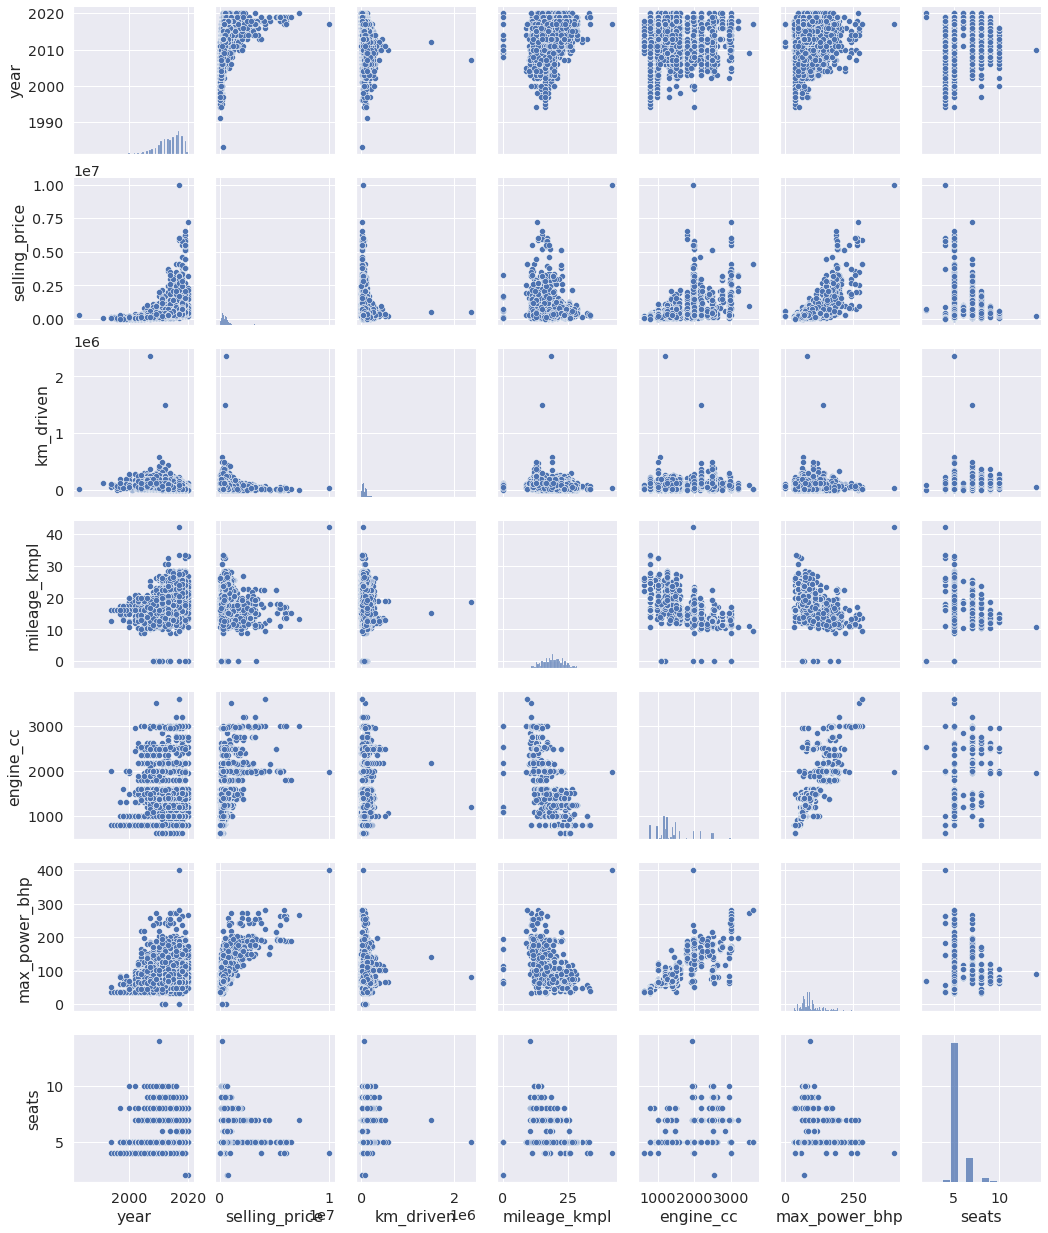

In [95]:
sns.pairplot(df, aspect=.85);

## 1. Pair plot

You can see the visual relationships between pairs

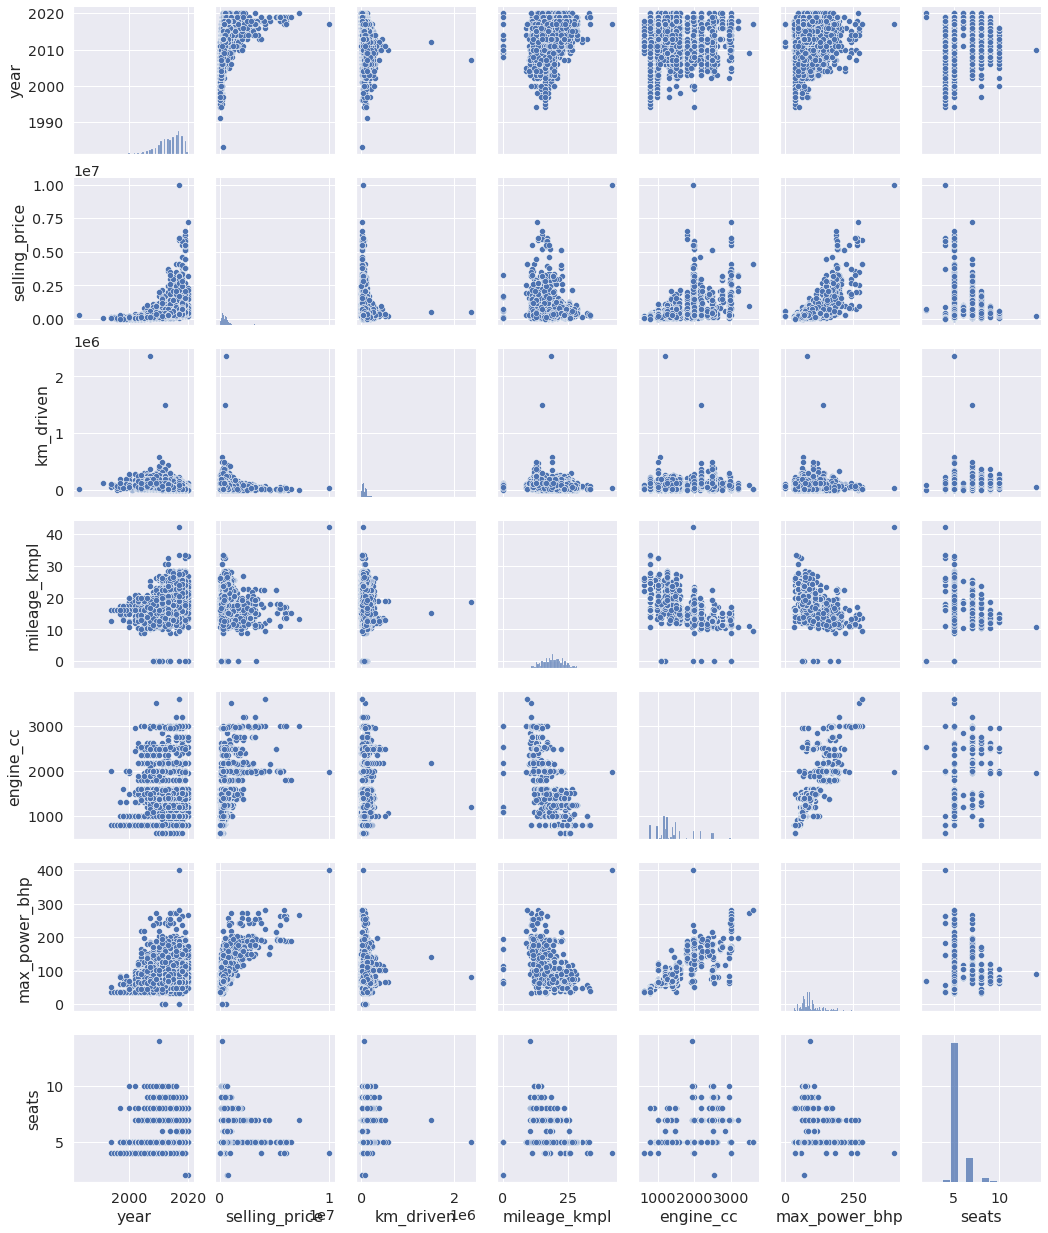

In [114]:
sns.pairplot(df, aspect=.85)

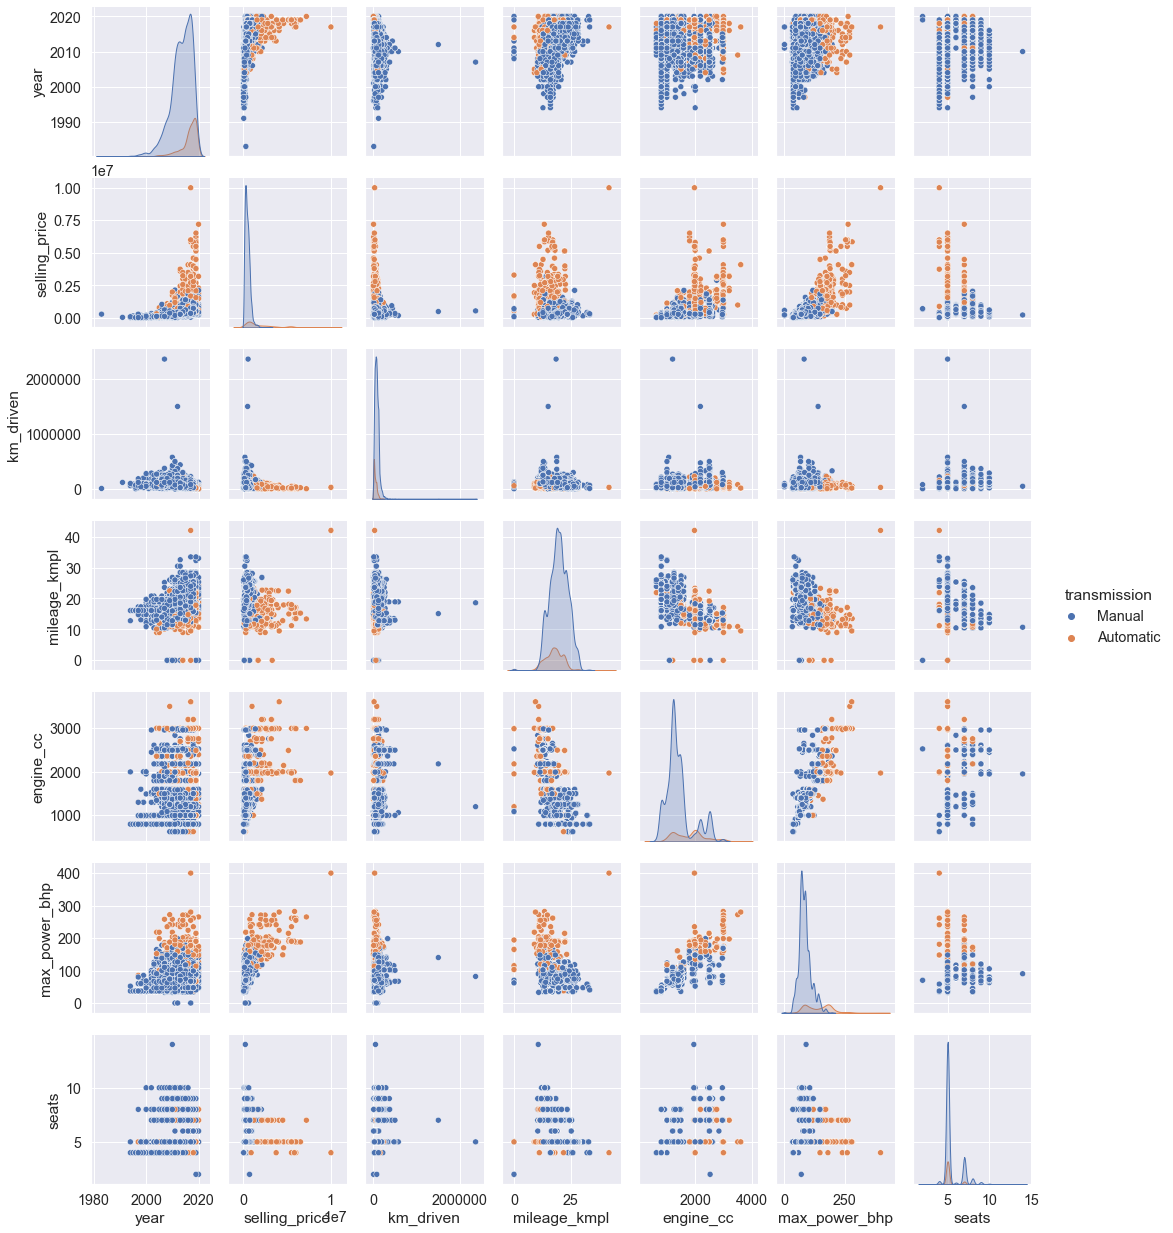

In [ ]:
sns.pairplot(data=df, 
             hue='transmission', 
             aspect=.85);

## 2. Heatmap

Enables you to determine correlations.

Gives you a number that represents the actual correlations between variables.

In [97]:
df.corr()

,year,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336
mileage_kmpl,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085
engine_cc,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309
max_power_bhp,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000


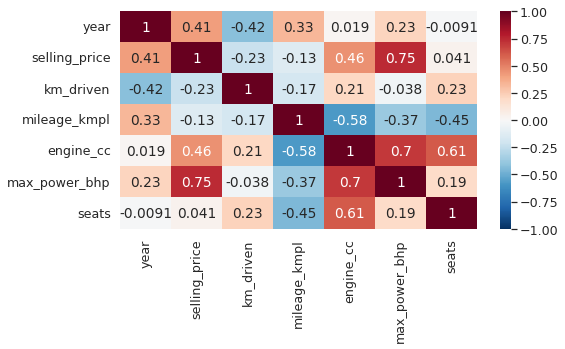

In [99]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), 
            cmap='RdBu_r', 
            annot=True, 
            vmin=-1, vmax=1);

## 3. Scatter plots

####  scatterplot

Text(0, 0.5, 'Fuel efficiency')

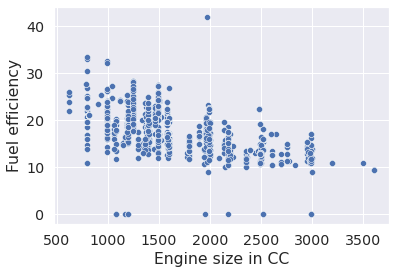

In [103]:
sns.set(font_scale=1.3)
sns.scatterplot(x = 'engine_cc', 
                y = 'mileage_kmpl', 
                data=df)
plt.xlabel('Engine size in CC')
plt.ylabel('Fuel efficiency')

#### Regplot
Regplot (axes level) and lmplot (figure-level) is a scatter plot that gives you a trend line, also called a regression line.

The shade around the line represents the dispersion on points in those areas.

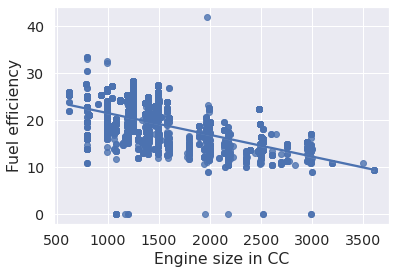

In [104]:
sns.regplot(x = 'engine_cc', 
            y = 'mileage_kmpl', 
            data=df)
plt.xlabel('Engine size in CC')
plt.ylabel('Fuel efficiency');

#### Scatterplot with hue

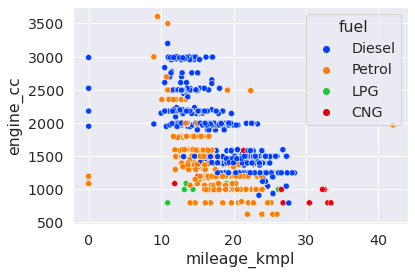

In [105]:
sns.scatterplot(x = 'mileage_kmpl',
                y = 'engine_cc', 
                data=df,
                palette='bright',
                hue='fuel');

#### Relplot (figure level)

In [106]:
sns.relplot(
    x='mileage_kmpl', 
    y='engine_cc', 
    data=df, 
    palette='bright',
    kind='scatter', 
    hue='fuel');

NameError: ignored

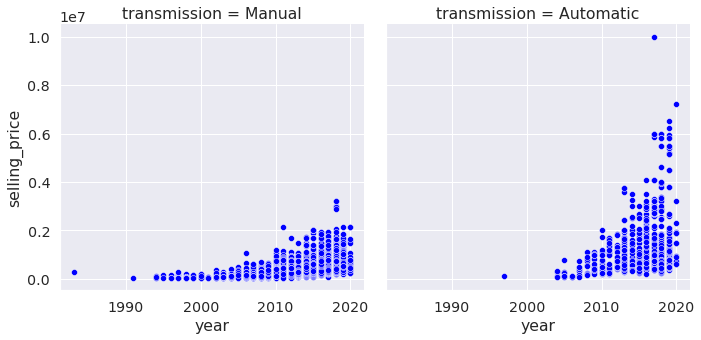

In [115]:
sns.relplot(x='year', 
            y='selling_price', 
            data=df, 
            kind='scatter', 
            col='transmission',
            color='blue');

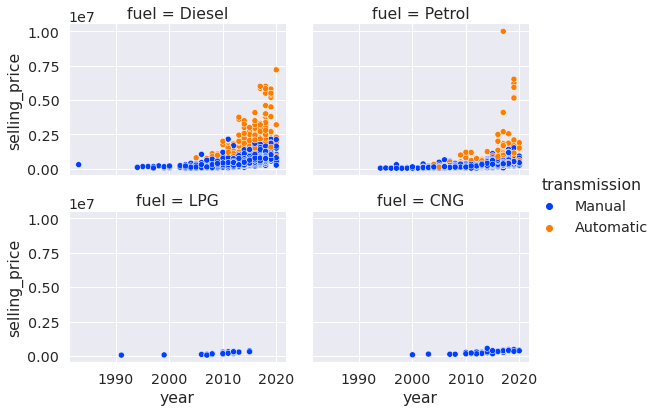

In [116]:
sns.relplot(
    x='year', 
    y='selling_price', 
    data=df,
    palette='bright',
    height=3, aspect=1.3,
    kind='scatter', 
    hue='transmission',
    col='fuel',
    col_wrap=2);

#### lmplot (figure-level for regplot)

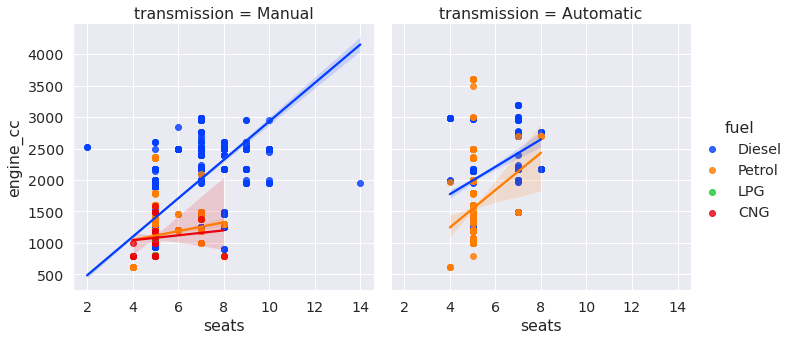

In [117]:
sns.lmplot(
    x="seats", 
    y="engine_cc", 
    data=df,
    palette='bright',
    col="transmission", 
    hue="fuel");

## 4. Line plot

#### lineplot

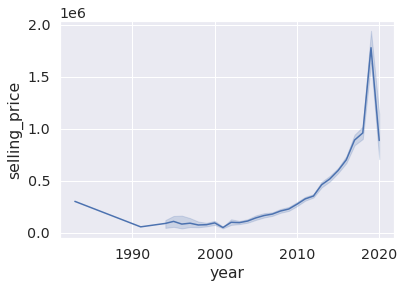

In [118]:
sns.lineplot(x="year", 
             y="selling_price",
             data=df)

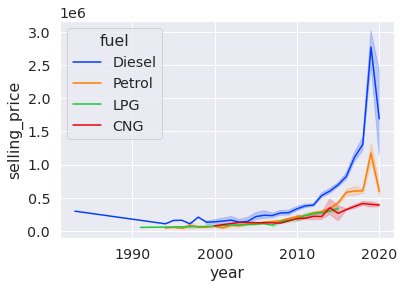

In [119]:
sns.lineplot(x="year", 
             y="selling_price",
             data=df,
             palette='bright',
             hue='fuel');

#### relplot

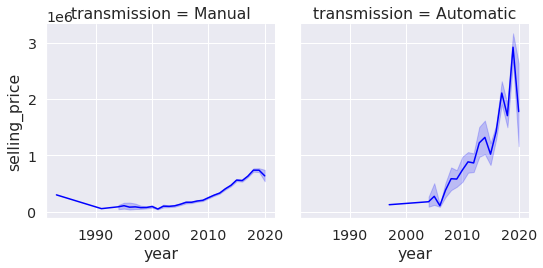

In [120]:
sns.relplot(x="year", 
            y="selling_price",
            data=df,
            kind='line',
            col='transmission',
            color='blue', height=4,);

            # The line shadow represents the confidence interval of the estimate.

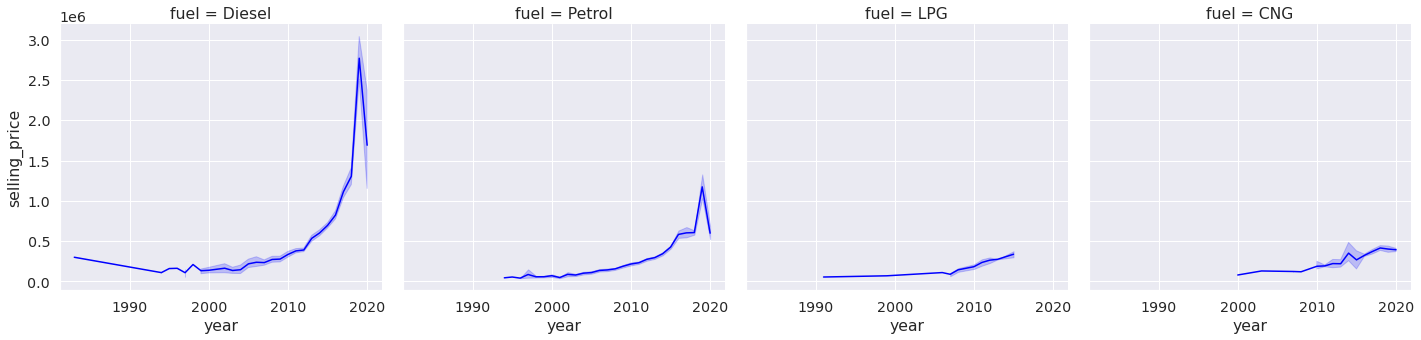

In [121]:
sns.relplot(x="year", 
             y="selling_price",
             data=df,
             kind='line',
             color='blue',
             col='fuel');

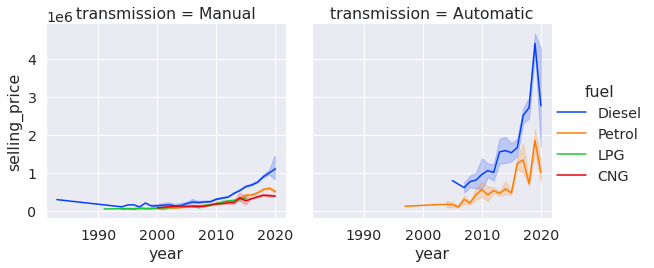

In [125]:
sns.relplot(x="year", 
            y="selling_price", 
            data=df,
            palette='bright', 
            height=4,
            kind='line', 
            col='transmission',
            hue="fuel") #,ci=None);

## 5. Joint plot

Figure-level. Contains a scatter plot and two distribution plots.

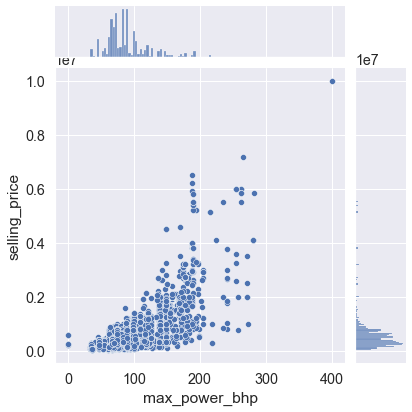

In [ ]:
sns.jointplot(x='max_power_bhp', 
              y='selling_price', 
              data=df);

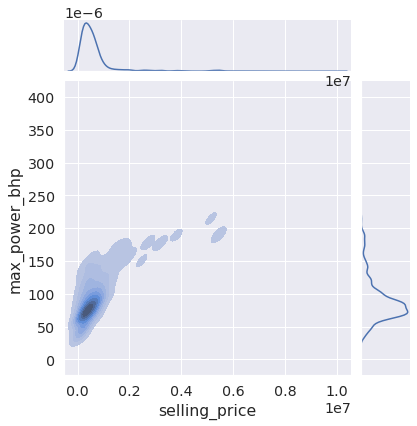

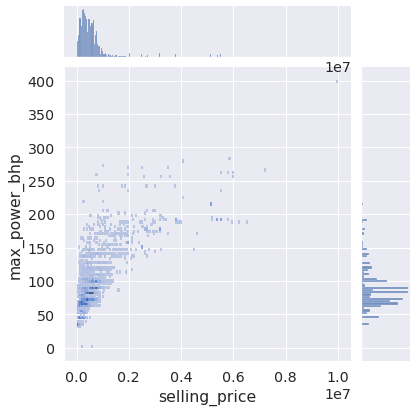

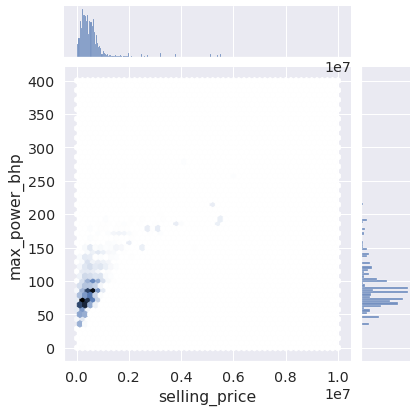

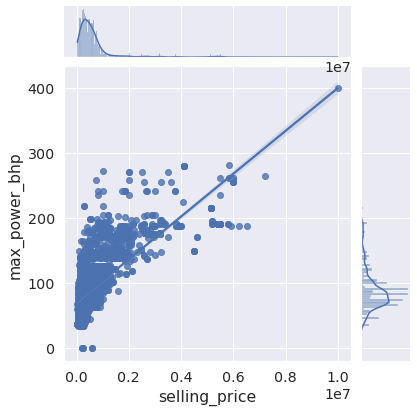

In [123]:
sns.jointplot(x='selling_price', y='max_power_bhp', data=df, kind='kde', shade=True);
sns.jointplot(x='selling_price', y='max_power_bhp', data=df, kind='hist');
sns.jointplot(x='selling_price', y='max_power_bhp', data=df, kind='hex');
sns.jointplot(x='selling_price', y='max_power_bhp', data=df, kind='reg');

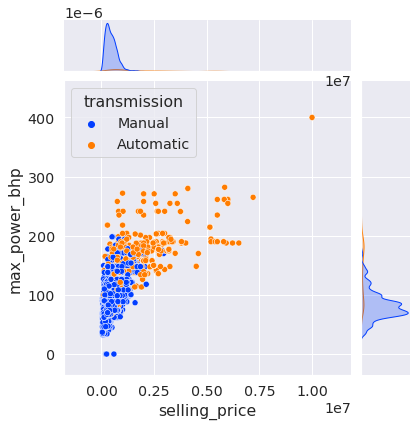

In [126]:
sns.jointplot(x='selling_price', 
              y='max_power_bhp', 
              data=df, 
              hue='transmission', 
              palette='bright');

# Part 2: Categorical and numeric relationships

## 6. Barplot

##### Bivariate relationships

Below, groups the data by fuel, then for each fuel type, it takes the mean of the selling price and plots it.

Groups by the fuel and takes the mean (default) of the selling price for each fuel type. You can change the estimator to be np.median, np.std, np.max

#### barplot

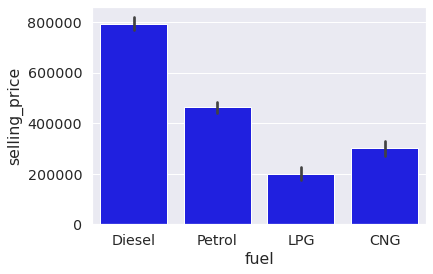

In [127]:
sns.barplot(x='fuel', 
            y='selling_price', 
            data=df, 
            color='blue');

##### Multivariate

This represents 2 categorical variables (distribution of selling price for 2 categorical variables)

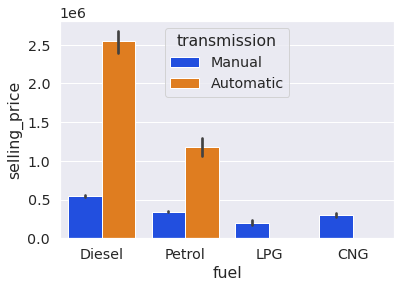

In [130]:
sns.barplot(x="fuel", 
            y="selling_price", 
            data=df, 
            palette='bright',
            hue="transmission")

#### catplot (figure level)

same results as above

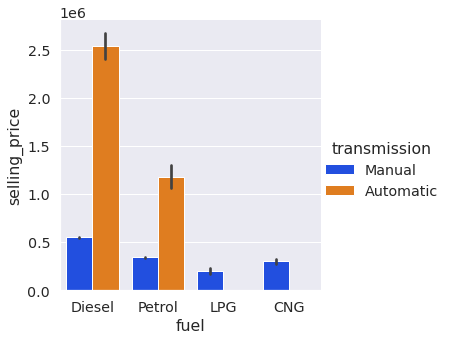

In [131]:
sns.catplot(x="fuel", 
            y="selling_price", 
            data=df,
            palette='bright',
            kind="bar",
            hue="transmission")

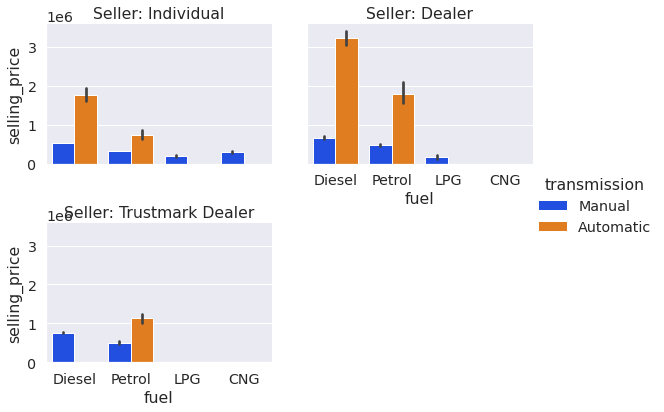

In [132]:
g = sns.catplot(
        x='fuel', 
        y='selling_price', 
        data=df,
        palette='bright',
        height=3, aspect=1.3,
        kind='bar',
        hue='transmission', 
        col ='seller_type',
        col_wrap=2)

g.set_titles(
    'Seller: {col_name}');

## 7. Point plot

What do the vertical lines in point plot mean? Is it the range of values?

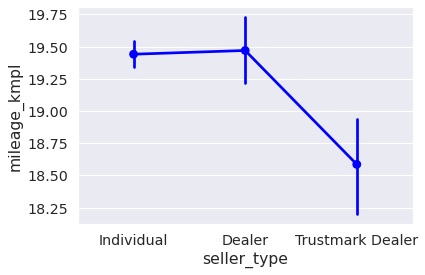

In [133]:
sns.pointplot(x='seller_type', 
              y='mileage_kmpl', 
              data=df, 
             color='blue');

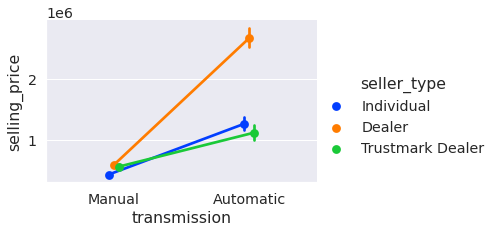

In [134]:
sns.catplot(x='transmission', 
            y='selling_price', 
            data=df, 
            palette='bright',
            dodge=True,
            kind='point', 
            hue='seller_type',
           height=3.5,
           aspect=1.5)

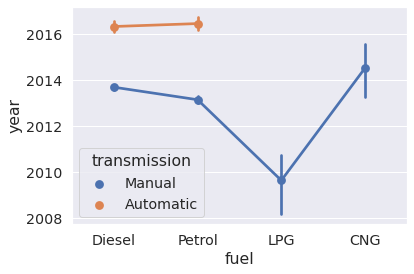

In [137]:
sns.pointplot(x='fuel', y='year', data=df, hue='transmission')

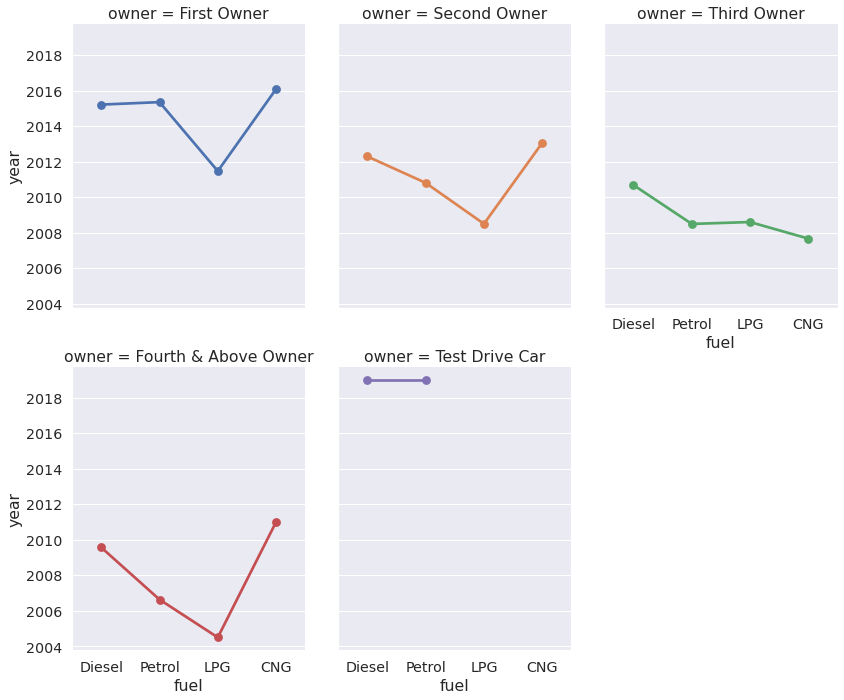

In [138]:
sns.catplot(
    x='fuel', 
    y='year', 
    data=df, 
    ci=None,  
    height=5, #default 
    aspect=.8,
    kind='point',
    hue='owner', 
    col='owner', 
    col_wrap=3);

## 8. Boxplot

#### boxplot

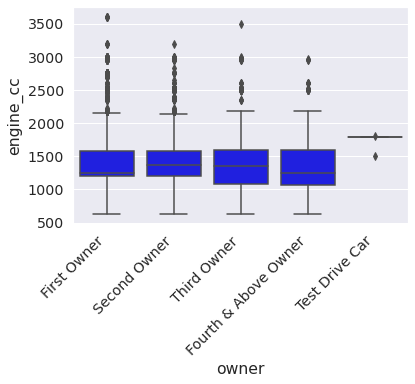

In [139]:
sns.boxplot(x='owner', 
            y='engine_cc', 
            data=df, 
            color='blue')

plt.xticks(rotation=45, ha='right');

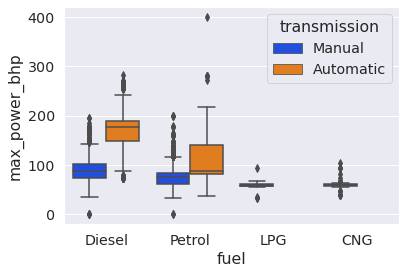

In [140]:
sns.boxplot(x='fuel', 
            y='max_power_bhp', 
            data=df,
            palette='bright',
            hue='transmission');

#### catplot kind='box'

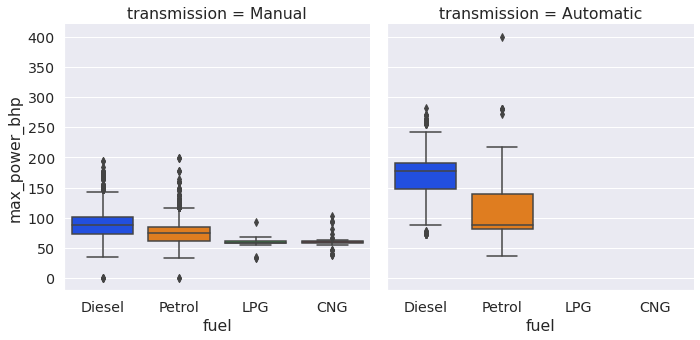

In [141]:
sns.catplot(x='fuel', 
            y='max_power_bhp',
            data=df,
            palette='bright',
            kind = 'box', 
            col='transmission');

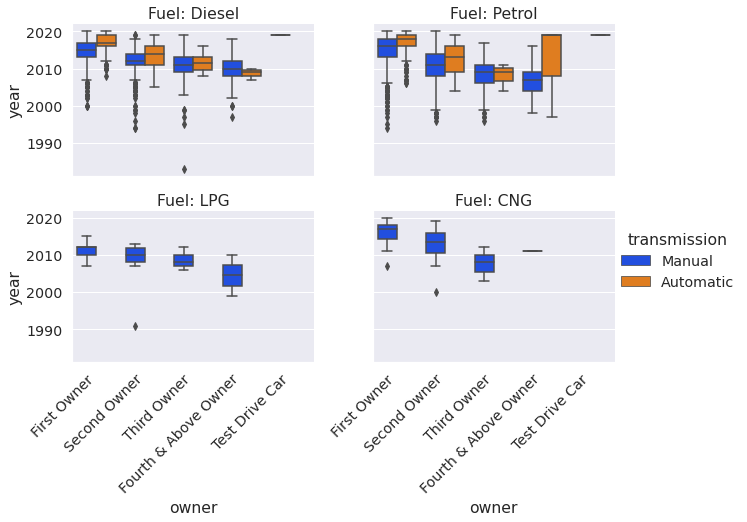

In [143]:
g = sns.catplot(
        x='owner', 
        y='year', 
        data=df,
        palette='bright',
        height=3, aspect=1.5,
        kind='box', 
        hue='transmission', 
        col='fuel',
        col_wrap=2)

g.set_titles(
    'Fuel: {col_name}');

g.set_xticklabels(
    rotation=45, 
    ha='right');

## 9. Violin plot

#### violinplot

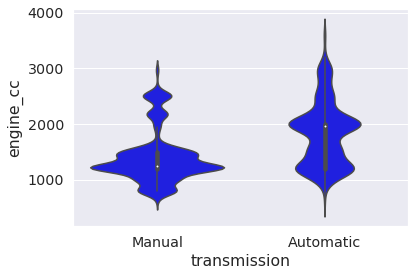

In [144]:
sns.violinplot(x='transmission', 
               y='engine_cc', 
               data=df, 
               color='blue')

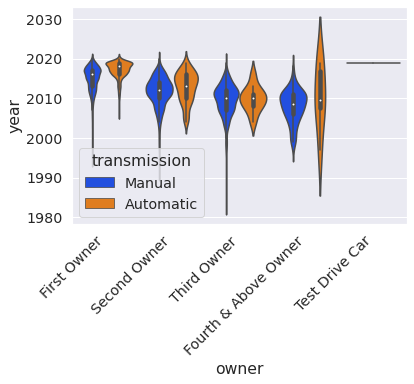

In [145]:
sns.violinplot(x='owner', 
               y='year', 
               data=df, 
               hue='transmission',
               palette='bright')

plt.xticks(rotation=45, ha='right');

#### catplot kind='violin'

split=False

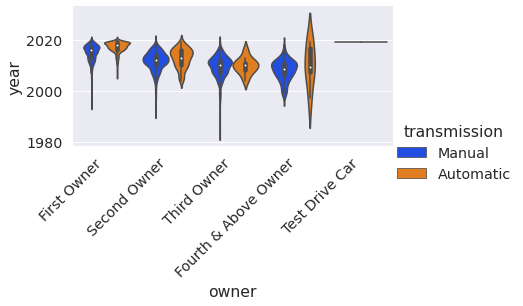

In [146]:
g = sns.catplot(x='owner', 
                y='year', 
                kind='violin', 
                hue='transmission',
                data=df, 
                palette='bright', 
                split=False,
                height=3,
                aspect=2)

g.set_xticklabels(rotation=45, 
                  ha='right')

split=True

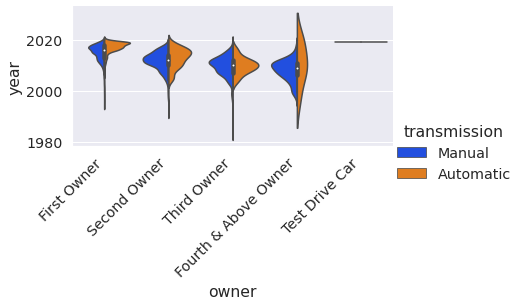

In [147]:
g = sns.catplot(x='owner', 
                y='year', 
                data=df,
                palette='bright',
                height=3,
                aspect=2,
                #split=False, 
                split=True,
                kind='violin', 
                hue='transmission')

g.set_xticklabels(rotation=45, 
                  ha='right')

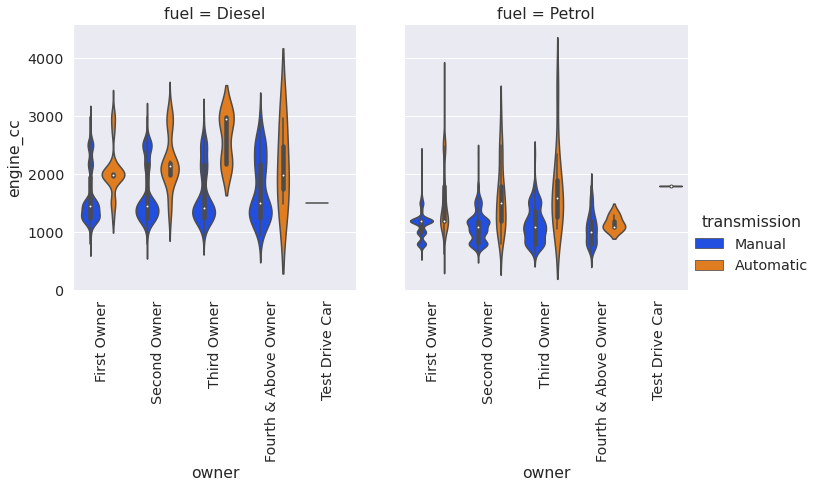

In [148]:
g = sns.catplot(data=df[df['fuel'].isin(['Diesel','Petrol'])], 
                x="owner", 
                y="engine_cc", 
                kind = 'violin', 
                hue="transmission",
                col = 'fuel', 
                palette = 'bright')

g.set_xticklabels(rotation=90);

## 10. Stripplot

This is a categorical scatter chart

Doesn't have quartiles but it shows the distribution of the different data points.

It's a scatterplot for categorical data. It shows the magnitude of data points at different locations when jitter=True

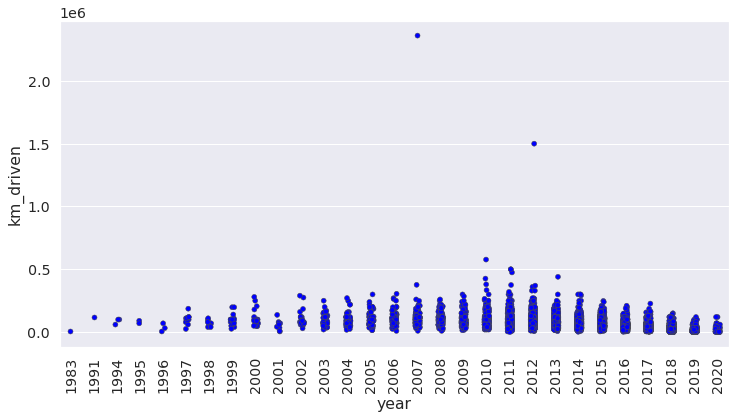

In [149]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='year', 
              y='km_driven', 
              data=df, 
              linewidth=.5, 
              color='blue')
plt.xticks(rotation=90);

dodge=False

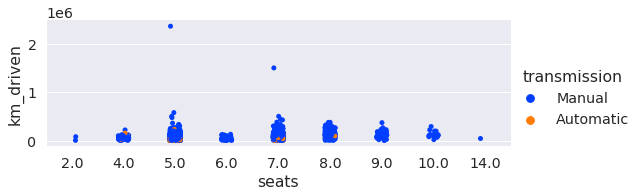

In [150]:
sns.catplot(x='seats', 
            y='km_driven', 
            data=df, 
            palette='bright', 
            height=3,
            aspect=2.5,
            #dodge=True,
            kind='strip',
            hue='transmission');

dodge=True

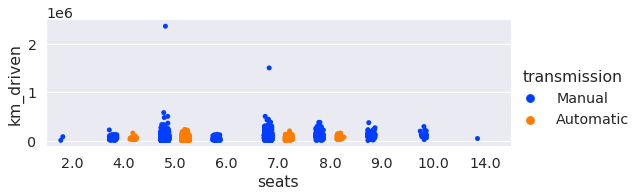

In [151]:
sns.catplot(x='seats', 
            y='km_driven', 
            data=df, 
            kind='strip',
            hue='transmission', 
            palette='bright', 
            dodge=True,
            jitter=.15,
            height=3,
            aspect=2.5);

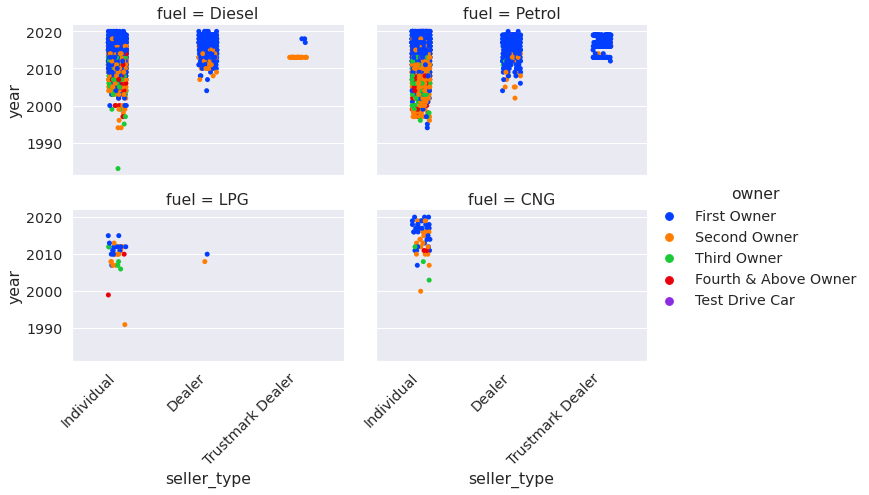

In [152]:
g = sns.catplot(
        x="seller_type", 
        y="year", 
        data=df, 
        palette='bright', 
        height=3, aspect=1.6,
        kind='strip',  
        hue='owner',
        col='fuel',
        col_wrap=2)

g.set_xticklabels(
        rotation=45, 
        ha='right');

### Stripplot with violinplot

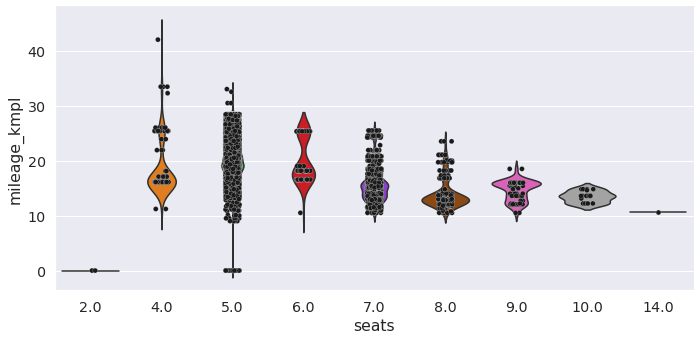

In [153]:
g = sns.catplot(
        x='seats', 
        y='mileage_kmpl', 
        data=df,
        palette='bright',
        aspect=2,
        inner=None,
        kind='violin')

sns.stripplot(
    x='seats', 
    y='mileage_kmpl', 
    data=df,
    color='k', 
    linewidth=0.2,
    edgecolor='white',
    ax=g.ax);